In [1]:
%matplotlib inline
import numpy as np
import numpy.polynomial.polynomial as pol
import matplotlib.pyplot as plt

In [5]:
def Bond_Duration(Yield, Maturity, CouponRate, FaceValue):
    #Yield: 債券利回り(%)
    #Maturity: 残存期間
    #CouponRate: 表面利率(%)
    #FaceValue: 額面
    #Output: 債券Duration
    Price = Bond_Price(Yield, Maturity, CouponRate, FaceValue)
    Coupon = 0.01 * CouponRate * FaceValue
    CF = np.hstack((np.tile(Coupon, int (Maturity) - 1), Coupon + FaceValue))
    Coef = np.linspace(1, Maturity, Maturity) * CF
    return pol.polyval(1.0 / (1.0 + 0.01 * Yield), np.hstack((0.0, Coef))) / Price

In [6]:
def Bond_Price(Yield, Maturity, CouponRate, FaceValue):
    Coupon = 0.01 * CouponRate * FaceValue
    CF = np.hstack((0.0, np.tile(Coupon, int(Maturity) - 1), FaceValue + Coupon))
    return pol.polyval(1.0 / (1.0 + 0.01 * Yield), CF)

C:\Users\tatsu\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


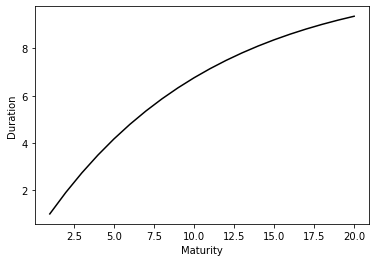

In [7]:
#%%Maturity(残存期間)とDurationの関係を示すグラフの作成
#FaceValue(額面)=100,Yield(債券利回り)=10%,CouponRate(表面利率)=10%
V_Maturity = np.linspace(1, 20, 20)
V_Duration1 = np.array([Bond_Duration(10, Maturity, 10, 100) for Maturity in V_Maturity])
fig1 = plt.figure(1, facecolor = 'w')
plt.plot(V_Maturity, V_Duration1, 'k-')
plt.xlabel(u'Maturity')
plt.ylabel(u'Duration')
plt.show()

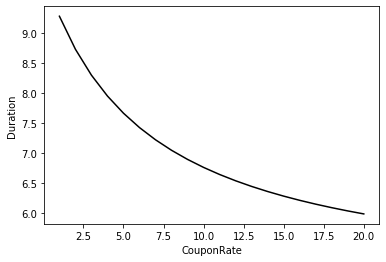

In [26]:
#%%CoupontRate(表面利率)とDurationの関係を示すグラフの作成
#Yield(利回り)=10%,Maturity(残存期間)=10,FaceValue(額面)=100
V_CouponRate = np.linspace(1, 20, 20)
V_Duration2 = np.array([Bond_Duration(10, 10, CouponRate, 100) for CouponRate in V_CouponRate])
fig1 = plt.figure(1, facecolor = 'w')
plt.plot(V_CouponRate, V_Duration2, 'k')
plt.xlabel(u'CouponRate')
plt.ylabel(u'Duration')
plt.show()